In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [27]:
df = pd.read_csv("C:\\Users\\rafal\\OneDrive\\Pulpit\\PSI\\TheStrokes.csv")
df.describe()
df = df.fillna(df.mean())
df=df.rename(columns={"stroke":"target"})

In [28]:
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,target
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

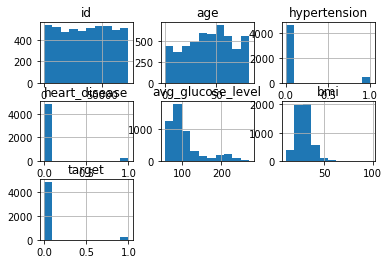

In [29]:
df.hist()

<AxesSubplot:>

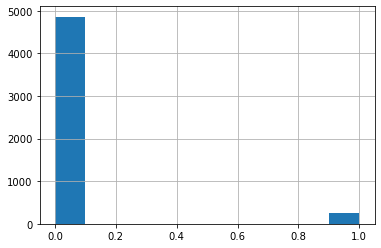

In [30]:
df["target"].hist()

In [31]:
df.drop("id", inplace=True, axis=1)

In [32]:
replace_map={'work_type':{'children': 0,'Never_worked': 1, 'Self-employed': 2, 'Private': 3, 'Govt_job': 4}}
labels = df['work_type'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)


{'work_type': {'children': 0, 'Never_worked': 1, 'Self-employed': 2, 'Private': 3, 'Govt_job': 4}}


In [33]:
replace_map={'ever_married':{'Yes': 1, 'No': 0}}
labels = df['ever_married'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'ever_married': {'Yes': 1, 'No': 0}}


In [34]:
replace_map={'Residence_type':{'Urban': 1, 'Rural': 0}}
labels = df['Residence_type'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'Residence_type': {'Urban': 1, 'Rural': 0}}


In [35]:
replace_map={'smoking_status':{'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}}
labels = df['smoking_status'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)

{'smoking_status': {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}}


In [36]:
replace_map={'gender':{'Male': 1, 'Other': 0, 'Female': -1,}}
labels = df['gender'].astype('category').cat.categories.tolist()
print(replace_map)
df.replace(replace_map, inplace=True)


{'gender': {'Male': 1, 'Other': 0, 'Female': -1}}


In [37]:
X = df.drop("target",axis=1).copy()
y=df["target"].copy()

In [103]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, stratify= y, random_state=50)

In [104]:
model1 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(400, activation='relu'),
                    keras.layers.Dense(200, activation='relu'),
                    keras.layers.Dense(200, activation='relu'),
                    keras.layers.Dense(100, activation='relu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model1.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='adam',
            metrics= ['accuracy']
            )

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 400)               4400      
_________________________________________________________________
dense_25 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_26 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_27 (Dense)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 145,102
Trainable params: 145,102
Non-trainable params: 0
_________________________________________________________________


In [105]:
history1 = model1.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.8988 - val_loss: 0.4045 - val_accuracy: 0.9515
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9535 - val_loss: 0.1836 - val_accuracy: 0.9515
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1964 - accuracy: 0.9461 - val_loss: 0.1875 - val_accuracy: 0.9515
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2079 - accuracy: 0.9489 - val_loss: 0.1719 - val_accuracy: 0.9515
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1722 - accuracy: 0.9559 - val_loss: 0.1778 - val_accuracy: 0.9515
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1535 - accuracy: 0.9602 - val_loss: 0.1698 - val_accuracy: 0.9515
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.9530 - val_loss: 0.1823 - val_accuracy:

In [106]:
np.max(history1.history["val_accuracy"])

0.9514867067337036

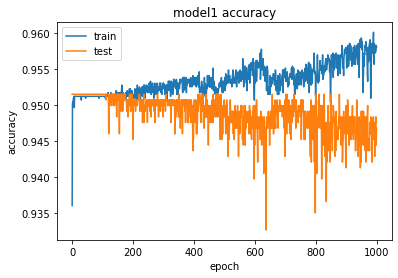

In [107]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

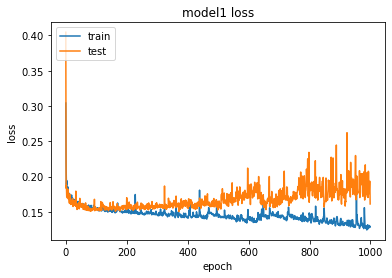

In [108]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [109]:
model2 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(400, activation='selu'),
                    keras.layers.Dense(200, activation='selu'),
                    keras.layers.Dense(200, activation='selu'),
                    keras.layers.Dense(100, activation='selu'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model2.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adam',
            metrics= ['accuracy']
            )

model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 400)               4400      
_________________________________________________________________
dense_29 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 100)               20100     
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 145,102
Trainable params: 145,102
Non-trainable params: 0
_________________________________________________________________


In [110]:
history2 = model2.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 0.8603 - accuracy: 0.8924 - val_loss: 0.1639 - val_accuracy: 0.9515
Epoch 2/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2675 - accuracy: 0.9386 - val_loss: 0.1888 - val_accuracy: 0.9515
Epoch 3/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.9362 - val_loss: 0.1680 - val_accuracy: 0.9515
Epoch 4/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1842 - accuracy: 0.9491 - val_loss: 0.1652 - val_accuracy: 0.9515
Epoch 5/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9527 - val_loss: 0.1604 - val_accuracy: 0.9515
Epoch 6/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9522 - val_loss: 0.1545 - val_accuracy: 0.9515
Epoch 7/1000
120/120 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9427 - val_loss: 0.1657 - val_accuracy:

In [111]:
np.max(history2.history["val_accuracy"])

0.9514867067337036

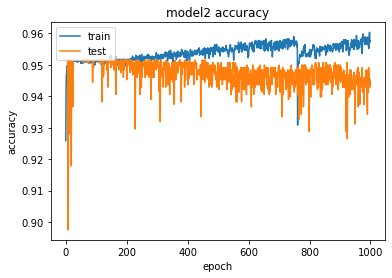

In [112]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

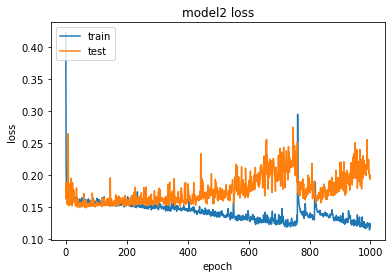

In [113]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
model3 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(200, activation='softplus'),
                    keras.layers.Dense(100, activation='softplus'),
                    keras.layers.Dense(50, activation='softplus'),
                    keras.layers.Dense(25, activation='softplus'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model3.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adagrad',
            metrics= ['accuracy']
            )

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_33 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_34 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_35 (Dense)             (None, 25)                1275      
_________________________________________________________________
output (Dense)               (None, 2)                 52        
Total params: 28,677
Trainable params: 28,677
Non-trainable params: 0
_________________________________________________________________


In [115]:
history3 = model3.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 1.9368 - accuracy: 0.7587 - val_loss: 0.2109 - val_accuracy: 0.9515
Epoch 2/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1857 - accuracy: 0.9565 - val_loss: 0.1970 - val_accuracy: 0.9515
Epoch 3/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9521 - val_loss: 0.2001 - val_accuracy: 0.9358
Epoch 4/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1854 - accuracy: 0.9496 - val_loss: 0.1824 - val_accuracy: 0.9515
Epoch 5/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1912 - accuracy: 0.9464 - val_loss: 0.1803 - val_accuracy: 0.9491
Epoch 6/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1654 - accuracy: 0.9555 - val_loss: 0.1821 - val_accuracy: 0.9468
Epoch 7/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1838 - accuracy: 0.9481 - val_loss: 0.1773 - val_accuracy:

In [116]:
np.max(history3.history["val_accuracy"])

0.9514867067337036

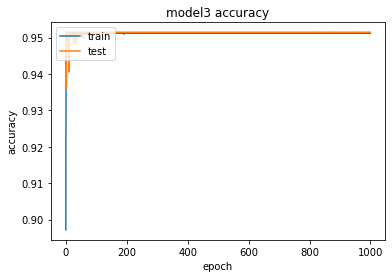

In [117]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

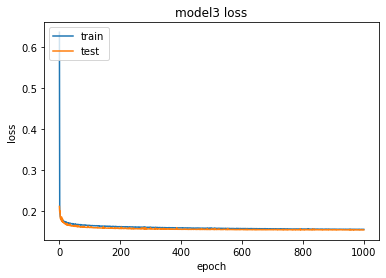

In [118]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
model4 = keras.models.Sequential([
                    keras.layers.Input(shape=X_train.shape[1], name='input'),
                    keras.layers.Dense(200, activation='softplus'),
                    keras.layers.Dense(100, activation='softplus'),
                    keras.layers.Dense(50, activation='softplus'),
                    keras.layers.Dense(25, activation='softplus'),
                    keras.layers.Dense(2, activation='softmax', name='output')
                    ])

model4.compile(
            loss='sparse_categorical_crossentropy',
            optimizer='Adamax',
            metrics= ['accuracy']
            )

model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_38 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_39 (Dense)             (None, 25)                1275      
_________________________________________________________________
output (Dense)               (None, 2)                 52        
Total params: 28,677
Trainable params: 28,677
Non-trainable params: 0
_________________________________________________________________


In [120]:
history4 = model4.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
120/120 [==============================] - 1s 3ms/step - loss: 0.9740 - accuracy: 0.8791 - val_loss: 0.1653 - val_accuracy: 0.9515
Epoch 2/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9482 - val_loss: 0.1612 - val_accuracy: 0.9515
Epoch 3/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1614 - accuracy: 0.9541 - val_loss: 0.1677 - val_accuracy: 0.9515
Epoch 4/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9551 - val_loss: 0.1579 - val_accuracy: 0.9515
Epoch 5/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1519 - accuracy: 0.9558 - val_loss: 0.1614 - val_accuracy: 0.9515
Epoch 6/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1676 - accuracy: 0.9540 - val_loss: 0.1855 - val_accuracy: 0.9515
Epoch 7/1000
120/120 [==============================] - 0s 1ms/step - loss: 0.1595 - accuracy: 0.9539 - val_loss: 0.1669 - val_accuracy:

In [121]:
np.max(history4.history["val_accuracy"])

0.9522691965103149

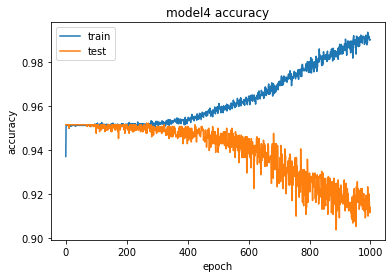

In [122]:
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model4 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

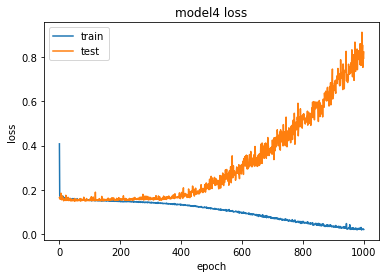

In [123]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()